In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [10]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/eminem.txt').read()
data=data.replace("("," ")
data=data.replace(")"," ")
data=data.replace("["," ")
data=data.replace("]"," ")



corpus = data.lower().split("\n")



tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-06-01 09:01:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-06-01 09:01:43 (62.2 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 100)           611500    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 300)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 3057)              308757    
_________________________________________________________________
dense_3 (Dense)              (None, 6115)              18699670  
Total params: 20,081,527
Trainable params: 20,081,527
Non-trainable params: 0
__________________________________________

In [12]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
1814/1814 [==============================] - 103s 57ms/step - loss: 6.5870 - accuracy: 0.0348
Epoch 2/100
1814/1814 [==============================] - 104s 57ms/step - loss: 6.1457 - accuracy: 0.0395
Epoch 3/100
1814/1814 [==============================] - 103s 57ms/step - loss: 5.9654 - accuracy: 0.0473
Epoch 4/100
1814/1814 [==============================] - 104s 57ms/step - loss: 5.8230 - accuracy: 0.0625
Epoch 5/100
1814/1814 [==============================] - 104s 57ms/step - loss: 5.6913 - accuracy: 0.0748
Epoch 6/100
1814/1814 [==============================] - 104s 57ms/step - loss: 5.5643 - accuracy: 0.0881
Epoch 7/100
1814/1814 [==============================] - 103s 57ms/step - loss: 5.4492 - accuracy: 0.0977
Epoch 8/100
1814/1814 [==============================] - 103s 57ms/step - loss: 5.3325 - accuracy: 0.1073
Epoch 9/100
1814/1814 [==============================] - 103s 57ms/step - loss: 5.2203 - accuracy: 0.1177
Epoch 10/100
1814/1814 [======================

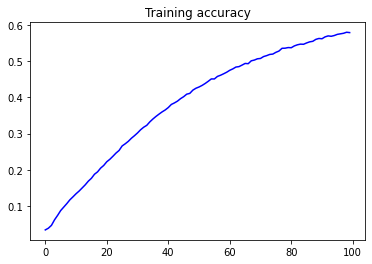

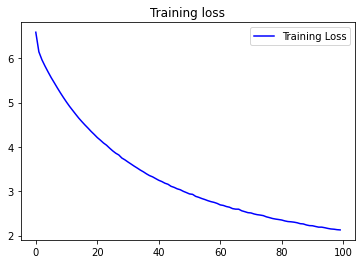

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [26]:
seed_text = "dog"
next_words = 30
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

dog fuck 'cause i am dead or whether for gettin' and abusing a vibe when i speak in tongues let each other's mind that i can do it again i'm sorry
